# Project 3 : Visualization

## Instructions

### Description

In this project, you will look at three bad visualizations then:

1. Identify what makes them bad
1. Use the same data to make a better chart
1. Explain an interesting pattern you noticed.

Some helpful questions to determine if a visualization is bad:

1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?
2. Is this the right visualization to use?
3. Does the visualization have the correct labels and axes limits?
4. Is there too much being shown in one visualization? Should it be split?

Some helpful questions to find patterns in a visualization:

1. How do different data points compare? Are there significant differences? Are there any outliers?
2. If comparing data/series, how do they rank? Is there a significant difference between rankings?
3. If looking at data over time, is there any seasonality? How do the values compare to the mean and/or median? How do the values change over time? Ex. Ups and downs? Always up? Always down?

### Getting Started

The lecture on data visualization (available in the usual places) has a lot of code examples.  Also don't forget the matplotlib documentation available from the Help menu in the notebook.

Also, this is the first assignment we've given where we ask you to provide text answers and not just code. You don't have to get fancy, but you'll want to use Markdown to write up your answers.  There is Markdown help available from the Help menu as well.

### Grading

For grading purposes, we will clear all outputs from all your cells and then run them all from the top.  Please test your notebook in the same fashion before turning it in.

### Submitting Your Solution

To submit your notebook, first clear all the cells (this won't matter too much this time, but for larger data sets in the future, it will make the file smaller).  Then use the File->Download As->Notebook to obtain the notebook file.  Finally, submit the notebook file on Canvas.

### Credits

Many thanks to Saad Elbeleidy for this assignment!

### Setup Code

In [1]:
## Imports
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Problem 1: Bad line chart (15 points)

To get you started, we'll walk through 1 bad visualization.

![Bad Line Chart](http://imgur.com/kB6uNZC.png)

In [2]:
# Bad line chart data & names
badLineNames = ["2016 Q1", "2016 Q2", "2016 Q3", "2016 Q4"]
badLineProduct1 = [240, 300, 280, 400]
badLineProduct2 = [300, 320, 150, 160]
badLineProduct3 = [120, 140, 180, 160]
badLineProduct4 = [380, 400, 450, 500]

**What makes this visualization bad?**

**1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?**

This visualization trys to show data over time.

**2. Is this the right visualization to use?**

Yes, we should be using a line chart to show data over time.

**3. Does the visualization have the correct labels and axes limits?**

There are no labels or a title. We could also use some more space between the min and maximum data points and the axes limits.

**4. Is there too much being shown in one visualization? Should it be split?**

Yes, it's quite difficult to follow each series, it should be split.


Since the chart type is the correct one, it seems all we need to do is add labels and split the lines into panels. Before we do that, we can probably also improve the design. We covered how to improve a `matplotlib` plot in class using different styles. Select a `style` and apply it below.

In [5]:
plt.style.use('seaborn-pastel')

Now we need to plot the data over different panels. We can use [`plt.subplots`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) to create multiple panels. Since we have 4 products, we're going to need 4 panels on top of each other. `subplots` returns two variables, the figure object and an array of axes. What we can do is loop through each Axes object and create a plot for that product. The first Axes object should plot the first product, the second should plot the second product and so on.

Here are the steps you should follow:

1. Create 4 line charts on top of each other, each plotting one of the products
1. Make sure all the y scales are the same. You can set the y scale using `set_ylim` on the Axes object. Consider adding some buffer between the lowest value and the start of the y axis as well as between the highest value and the end of the y axis.
1. Remove the x labels for all panels except the bottom one
1. Add a title to each of the plots with the product number
1. Add a title to the figure
1. Calculate either the mean or median of the entire data set and add a dashed line on each panel with that value

[ 305.   232.5  150.   432.5]


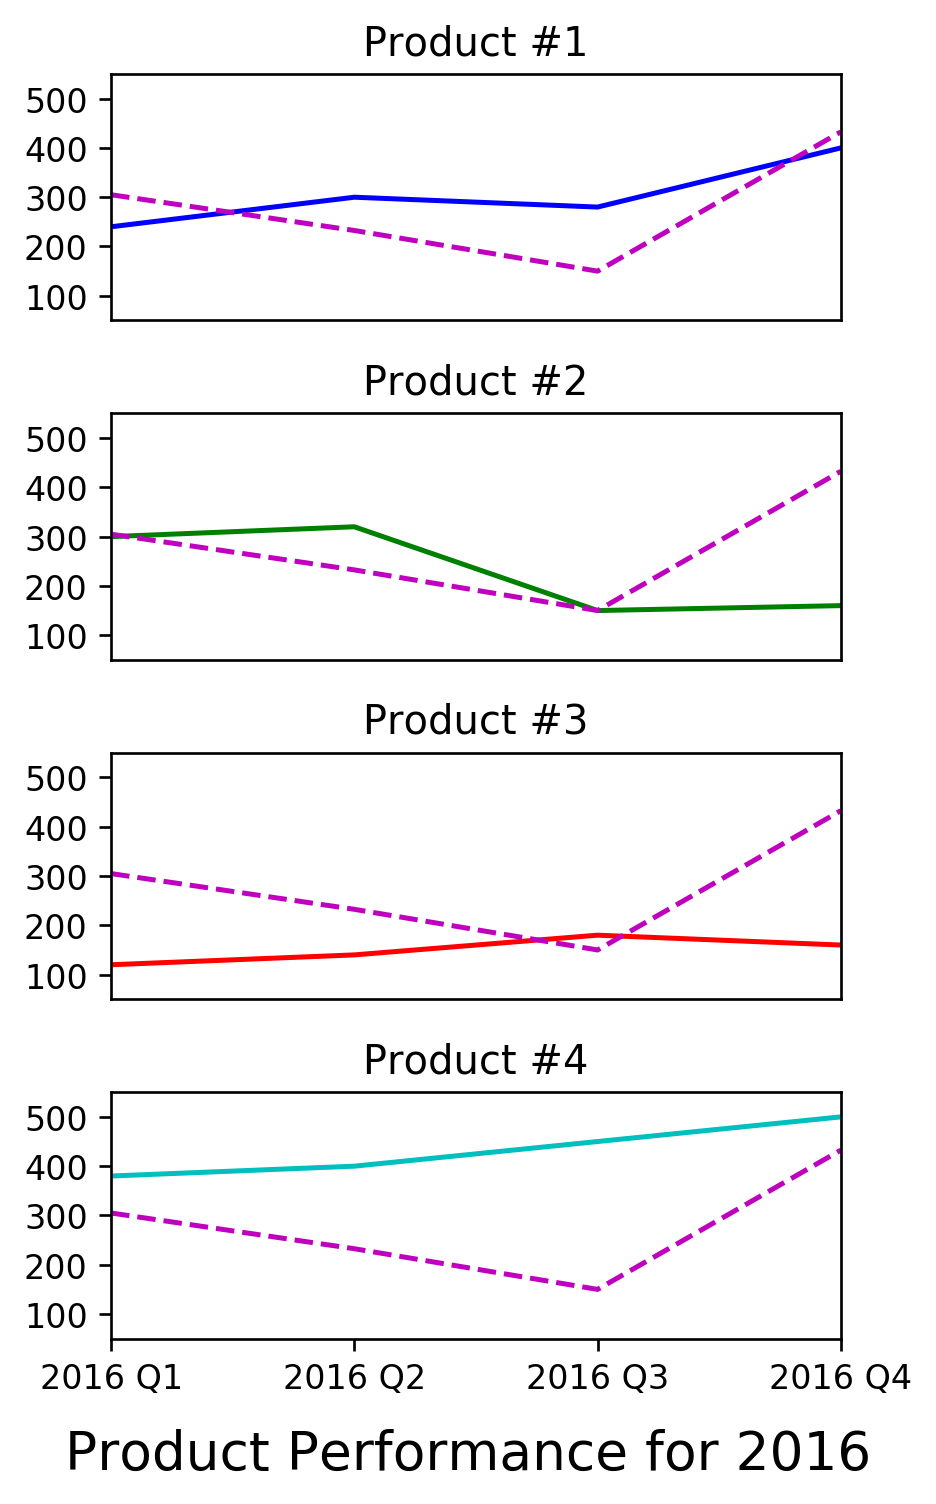

In [53]:
# I assume this is what's meant by "on top of each other"
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(4,6), dpi=120)
axes = axes.ravel()

X = list(range(4))
Y = [badLineProduct1, badLineProduct2, badLineProduct3, badLineProduct4]
mean = np.mean(np.array(Y), axis=1)
print(mean)
color = ['b', 'g', 'r', 'c']

for i, axis in enumerate(axes):
    axis.plot(X, Y[i], color[i]+'-')
    axis.plot(X, mean, 'm--')
    axis.set_ylim(50, 550)
    axis.locator_params(axis='y', nbins=5)
    axis.set_xlim(0,3)
    axis.set_title("Product #%s" % str(i+1))
    if i < 3:
        axis.xaxis.set_visible(False)
    else:
        axis.locator_params(axis='x', nbins=4)
        axis.set_xticklabels(badLineNames)


fig.suptitle("Product Performance for 2016", fontsize=16, y=0)
fig.tight_layout()
plt.show()

Now that you've created a better plot, try to describe a pattern in the dataset. Use the following questions as a reference:

1. How do different data points compare? Are there significant differences? Are there any outliers?
2. If comparing data/series, how do they rank? Is there a significant difference between rankings?
3. If looking at data over time, is there any seasonality? How do the values compare to the mean and/or median? How do the values change over time? Ex. Ups and downs? Always up? Always down?

**Your Answer Here:**

Products 1 and 2 share general patterns and inflections, though 1 finishes the year much higher than it began while 2 tapers off. Product 4 is consistently higher than the others, and trends upward throughout the year. Product 3 is consistently lower than the others, but grows slowly until the third quarter when it begins to taper off. None of the produts match the mean very well, except that Products 2 and 3 come close to the mean value in the third quarter.

Next, look through the following bad visualizations and apply the above workflow to:

1. Determine what makes them bad
1. Create a better visualization
1. Describe a pattern in the data

### Problem 2: Bad pie chart (20 points)

Explain why this visualization is a bad one:

![Bad Pie Chart](http://imgur.com/Wg9DOZd.png)

**Your Answer Here:**

Well, for starters it's a pie chart. To make matters worse, it appears to be distended, without even the added benefit of looking neat due to 3d effects. This chart's trying to show a comparison, but it'd be better to use a bar chart. There's no title and actual numerical information isn't given at all, meaning you have to just "eyeball it" to compare values. There's not a whole lot going on here, so I don't think it needs to be split.

In [54]:
badPieNames = ["Golden", "Boulder", "Denver", "Colo Springs"]
badPieValues = [0.37, 0.4, 0.5, 0.35]

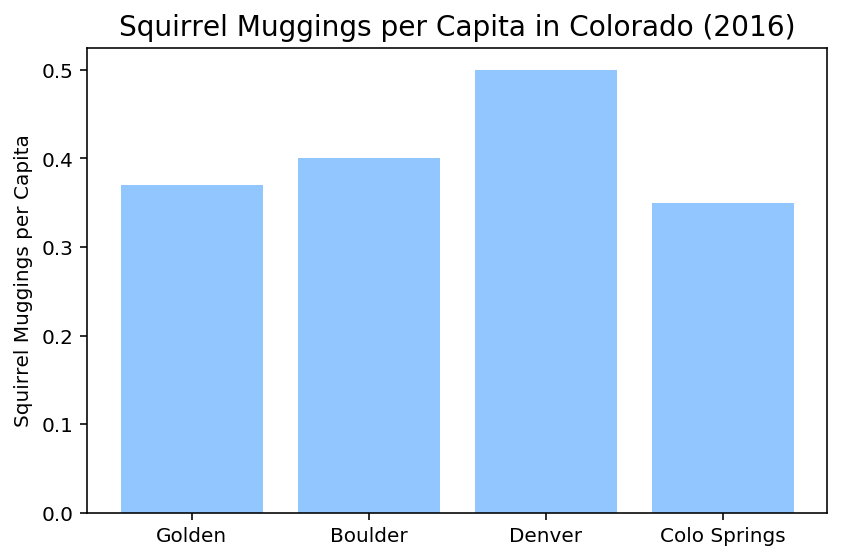

In [68]:
objs = range(len(badPieNames))
plt.bar(objs, badPieValues)
plt.xticks(objs, badPieNames)
plt.ylabel("Squirrel Muggings per Capita")
plt.title("Squirrel Muggings per Capita in Colorado (2016)", fontsize=14)
plt.tight_layout()
plt.show()

Tell a story or describe a pattern using your new visualization.

**Your Answer Here:**

>This graph tells the sad tale of aggressive, tree-borne rodents ruthlessly praying upon Colorado Residents. The situation has become so dire that nearly one two Denver citizens were accosted last year, and no fewer than one in every three citizens reported being mugged by bushy-tailed bandits in major cities throughout Colorado.

### Problem 3: Bad bar chart 1 (20 points)

Explain why this visualization is a bad one:

![Bad Bar Chart](http://imgur.com/AkLyM9I.png)

**Your Answer Here:**

Assuming A, B and C don't represent points in time, this appears to be a comparison of some kind, but lacking proper axis titles or a title as it is, I can't tell what comparison is being attempted. A bar chart is the proper type of visualization for a comparison, and it doesn't need to be split, but the y-axis could stand to be adjusted since the difference between A and C accounts for nearly the entire graph's height but is less than 5% of the actual values. The axes ought to more intuitively show how closely these values actually match.

In [61]:
badBarNames = ["A", "B", "C"]
badBarValues = [240, 242, 250]

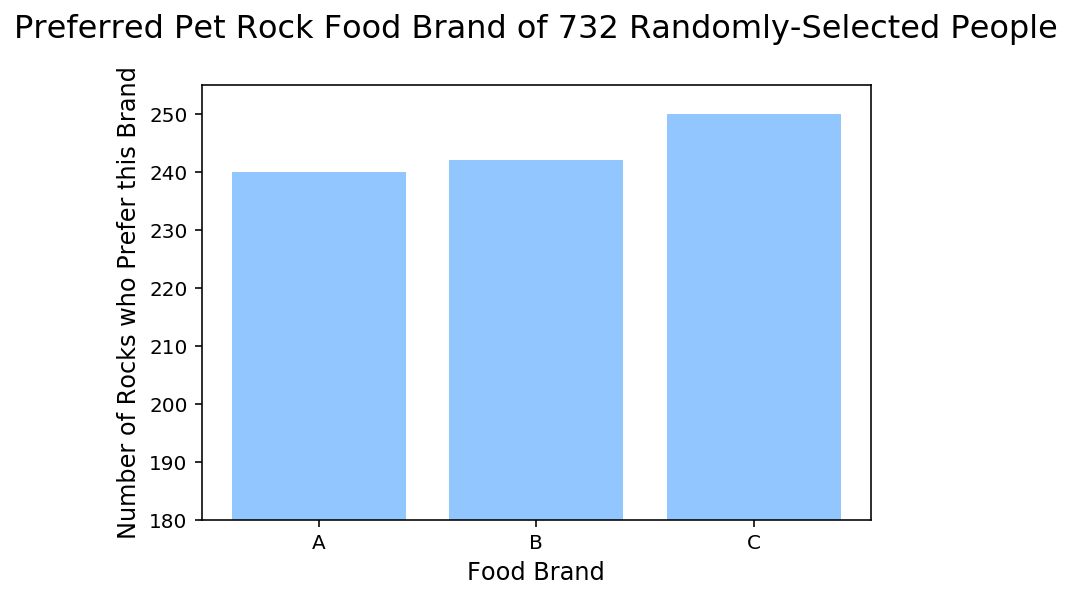

In [82]:
objs = range(len(badBarNames))
plt.bar(objs, badBarValues)
plt.xticks(objs, badBarNames)
plt.ylabel("Number of Rocks who Prefer this Brand", fontsize=12)
plt.gca().set_ylim(180, 255)
plt.xlabel("Food Brand", fontsize=12)
plt.title("Preferred Pet Rock Food Brand of %s Randomly-Selected People" % sum(badBarValues), fontsize=16, y=1.08)
plt.show()

Tell a story or describe a pattern using your new visualization.

**Your Answer Here:**

>This chart shows the result of a blind taste-test conducted on pet rock owners. Participants fed their pet rocks a sample of each brand. Then, three bowls containing each brand were placed in front of the rock, and the brand it chose to eat was recorded. The results show that while brand C is marginally more popular than brands A and B, rocks are largely indefferent as to which brand of food they are fed. 

### Problem 4: Bad bar chart 2 (20 points)

Explain why this visualization is a bad one:

![Bad Bar Chart](http://imgur.com/Ns3lgyp.png)

**Your Answer Here:**

>This appears to be showing the change in something over time, but for some reason it's using a bar chart instead of a line graph. the axes are also all goofy: the x axis is offset too far to the right and the y axis's scale makes the 'Jul' value confusing; I can't tell if it's 500 or greater than 500 (though it's probably 500). Also, I don't know what data is being plotted, due to lack of axis labels or a title.

In [83]:
badBar2Names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
badBar2Values = [240, 320, 360, 280, 290, 300, 500, 410, 390, 200, 220, 240]

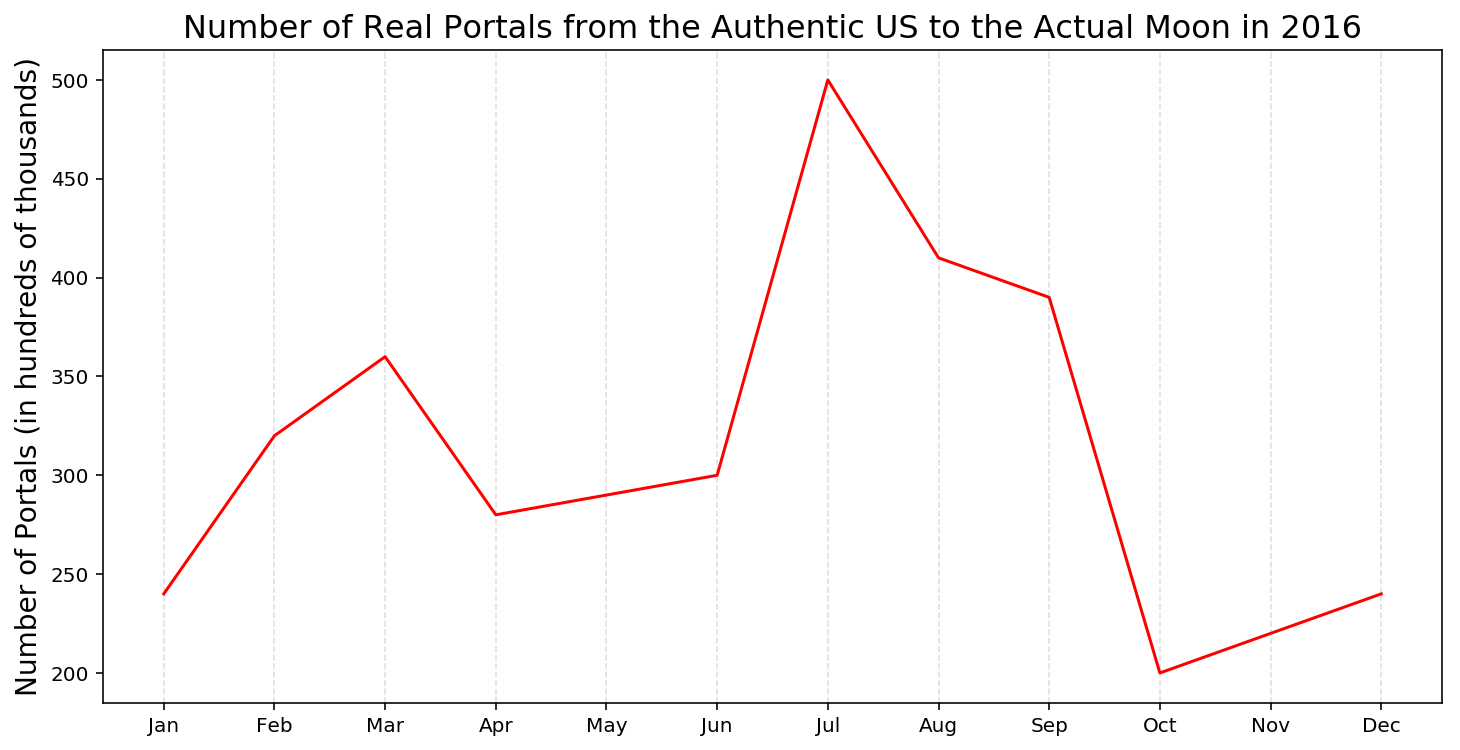

In [102]:
fig = plt.figure(figsize=(12, 6))
axes = fig.gca()
objs = range(len(badBar2Names))
axes.plot(objs, badBar2Values, 'r-')
axes.grid(which='major', axis='x', alpha=0.4, linestyle='--')
plt.xticks(objs, badBar2Names)
plt.ylabel("Number of Portals (in hundreds of thousands)", fontsize=14)
plt.title("Number of Real Portals from the Authentic US to the Actual Moon in 2016", fontsize=16)
plt.show()

Tell a story or describe a pattern using your new visualization.

**Your Answer Here:**

>As shown on the graph, the number of mystic portals between the literal Moon and the concretely real United States peaked in July - obviously because the Moon is cool and refreshing and July is the hottest part of the year in America. As weather grew colder, many factually American citizens chose to close their sorcerous portals, with a slight pickup toward the end of December as the New Year celebrations drew nearer. Early in 2016, the unusual uptick in spring was caused by massive weeks-long parties through February to celebrate Leap Day - as has been custom since the current calendar was ratified by the Illuminade Council on the day of their Ascension Blessed Be The Overlords! In March, most already-opened arcane portals stayed open, plus a few more in anticipation of one of the biggest holidays of the year for genuine America: Read Across America Day. As everyone knows, light levels on the complete and total Moon are prime for reading. Afterward, portals close until July heat prompts re-opening.